## Problem Statement :

Sentiment Analysis is the task of analyzing people’s opinions in textual data (e.g., product reviews, movie reviews, or tweets), and extracting their polarity and viewpoint. The task can be cast as either a binary or a multi-class problem. Binary sentiment analysis classifies texts into positive and negative classes, while multi-class sentiment analysis classifies texts into fine-grained labels or multi-level intensities.

The goal of this project is to use deep learning techniques to identify the level toxicity of a comment which could be used to help deter users from posting potentially hurtful comments, engage in more sophisticated arguments and make internet a safer place. 

Our dataset consists of 6 labels namely highly malignant, malignant, abuse, threat, loathe and rude. This project aims to implement various Machine Learning algorithms and deep learning algorithms like Multilayer perceptron(MLP), Long Short Term Memory Networks, Multinomial Naïve Baiyes, Logistic Regression, Random Forest Classifier , Linear SVC and Adaptive Boosting.

In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scikitplot as skplt
import missingno as msno
import eli5


#Importing DataCleaning Libraries
import nltk
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

#Importing Classification Models 
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Importing Classification Model Evaluation Metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss, hamming_loss, average_precision_score

#Importing Hyperparameter Tuning model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Importing Serialization libraries
import joblib

In [6]:
#Loading Dataset
train = pd.read_csv('train.csv')
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
test = pd.read_csv('test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [8]:
# Shape of dataset
print('"Shape of train csv is Rows: {} Columns: {}'.format(train.shape[0], train.shape[1]))
print('"Shape of test csv is Rows: {} Columns: {}'.format(test.shape[0], test.shape[1]))

"Shape of train csv is Rows: 159571 Columns: 8
"Shape of test csv is Rows: 153164 Columns: 2


In [9]:
#Analysing Datatypes in our train dataset and Checking for null Values

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [10]:
#Analysing Datatypes in our test dataset and Checking for null Values

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [11]:
print("Null values in train csv: \n \n",train.isna().sum())
print("\n \n Null values in train csv : \n \n ",test.isna().sum())

Null values in train csv: 
 
 id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

 
 Null values in train csv : 
 
  id              0
comment_text    0
dtype: int64


AxesSubplot(0.125,0.125;0.62x0.755)


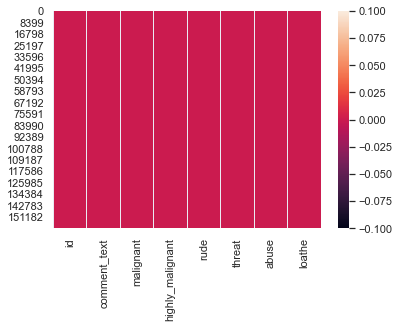

In [12]:
#Visualising null values in train csv

print(sns.heatmap(train.isna()))

AxesSubplot(0.125,0.125;0.62x0.755)


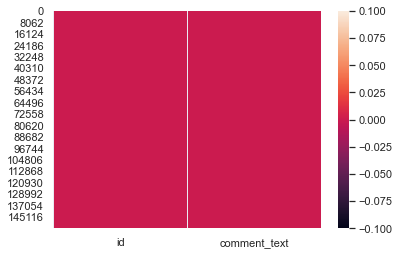

In [13]:
#Visualising null values in test csv

print(sns.heatmap(test.isna()))

In [14]:
#Checking for duplicated values in our dataset

print("Duplicated values in train csv: \n \n",train.duplicated().sum())
print("\n \n Duplicated values in train csv : \n \n ",test.duplicated().sum())

Duplicated values in train csv: 
 
 0

 
 Duplicated values in train csv : 
 
  0


In [15]:
#Analysing Datatypes in our dataset and Checking for null Values

train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


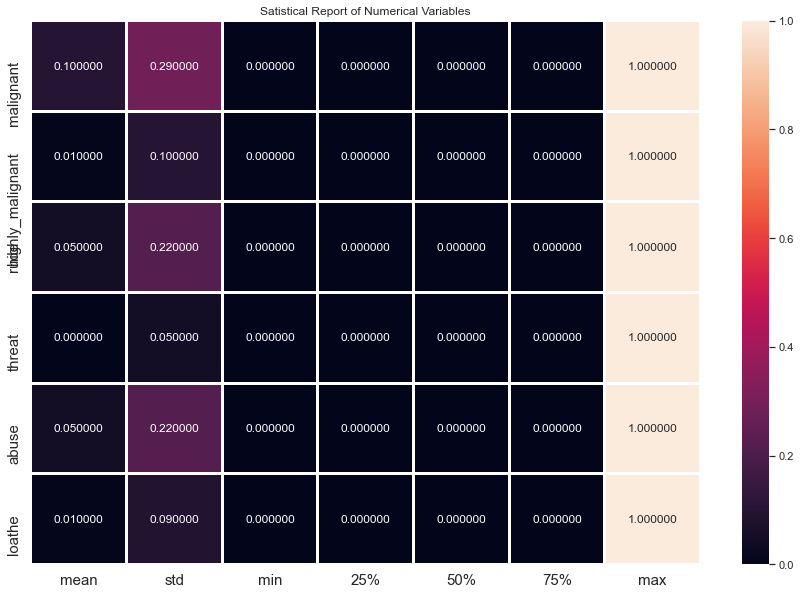

In [16]:
#visualizing statistical description of dataset
plt.figure(figsize = (15,10))
sns.heatmap(round(train.describe()[1:].transpose(),2),linewidth = 2,annot= True, fmt = "f")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Satistical Report of Numerical Variables")
plt.show()

In [17]:
# Correlation Matrix

train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'malignant'),
  Text(0, 1.5, 'highly_malignant'),
  Text(0, 2.5, 'rude'),
  Text(0, 3.5, 'threat'),
  Text(0, 4.5, 'abuse'),
  Text(0, 5.5, 'loathe')])

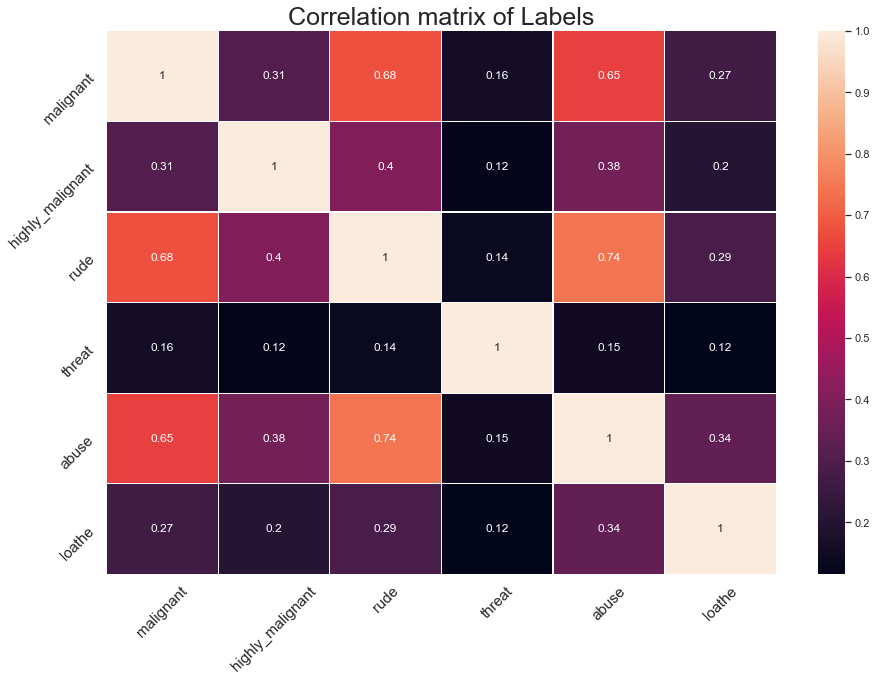

In [18]:
plt.figure(figsize = (15,10))
sns.heatmap(train.corr(),annot = True, linewidth = '.2')
plt.title("Correlation matrix of Labels", fontsize = 25)
plt.xticks(fontsize=15, rotation =45)
plt.yticks(fontsize=15, rotation =45)

## Univariate Analysis

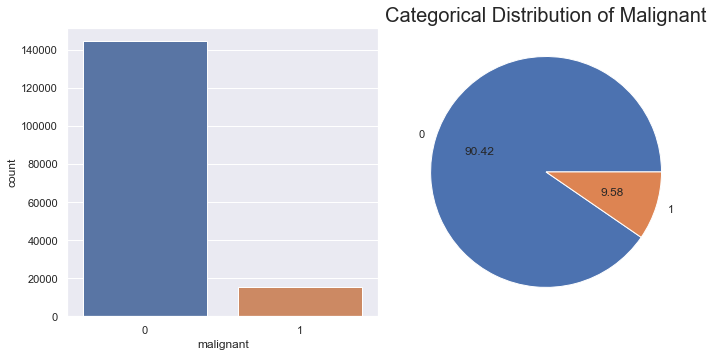

In [19]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(train['malignant'], ax = ax[0])
train.groupby('malignant').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Malignant", fontsize = 20)
plt.ylabel(None)
plt.tight_layout()

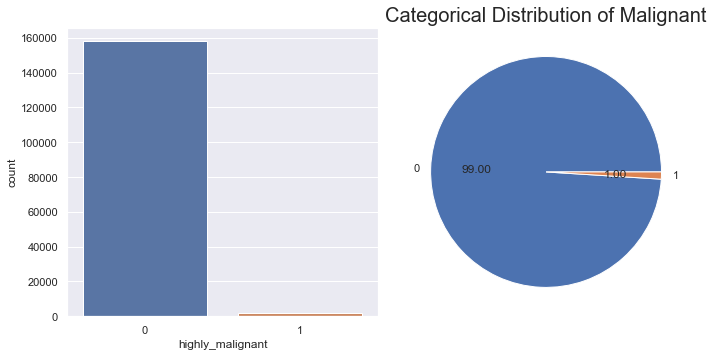

In [16]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(train['highly_malignant'], ax = ax[0])
train.groupby('highly_malignant').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Malignant", fontsize = 20)
plt.ylabel(None)
plt.tight_layout()

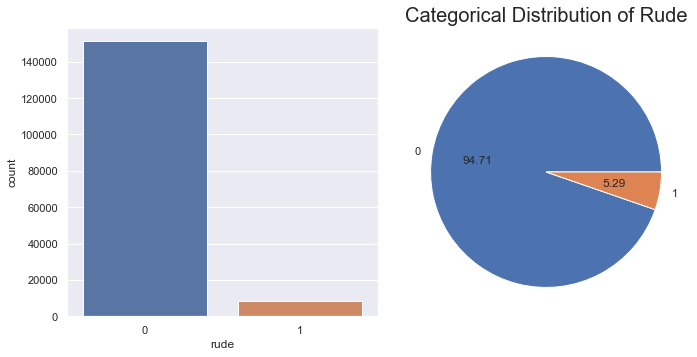

In [17]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(train['rude'], ax = ax[0])
train.groupby('rude').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Rude", fontsize = 20)
plt.ylabel(None)
plt.tight_layout()

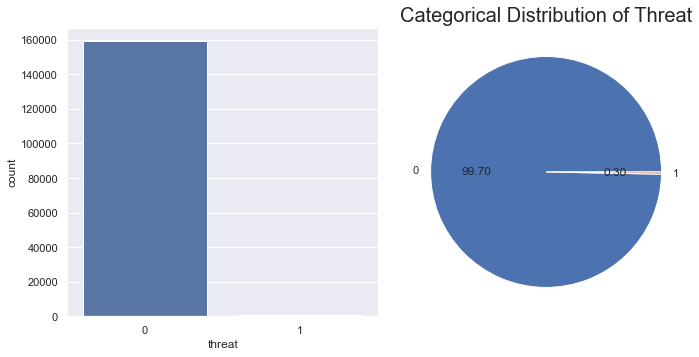

In [18]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(train['threat'], ax = ax[0])
train.groupby('threat').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Threat", fontsize = 20)
plt.ylabel(None)
plt.tight_layout()

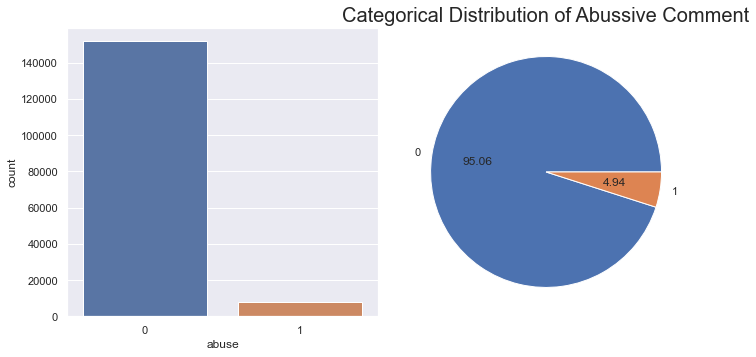

In [19]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(train['abuse'], ax = ax[0])
train.groupby('abuse').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Abussive Comment", fontsize = 20)
plt.ylabel(None)
plt.tight_layout()

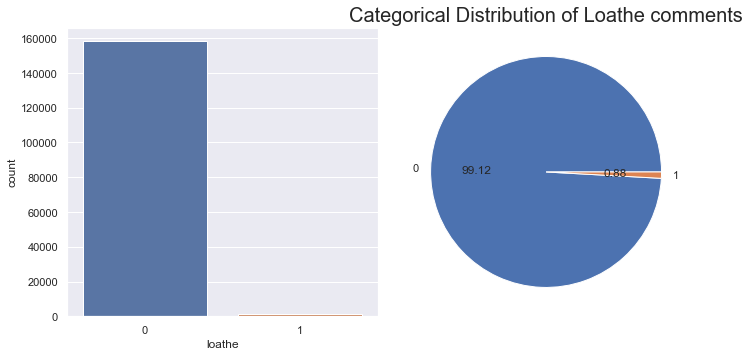

In [20]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(train['loathe'], ax = ax[0])
train.groupby('loathe').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Loathe comments", fontsize = 20)
plt.ylabel(None)
plt.tight_layout()

In [21]:
data_count = train.iloc[:,2:].sum()
data_count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

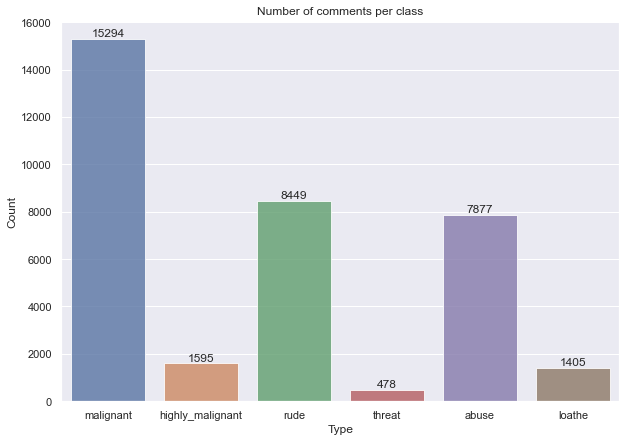

In [22]:
#Multivariate Analysis of all our Multi Labels

plt.figure(figsize=(10,7))
ax = sns.barplot(data_count.index, data_count.values, alpha=0.8)

plt.title("Number of comments per class")
plt.ylabel("Count")
plt.xlabel("Type")

rects = ax.patches
labels = data_count.values
for rect, label in zip(rects,labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height +5,label, ha = 'center', va = 'bottom')

### Data Visualization using WordCloud

In [23]:
from wordcloud import WordCloud

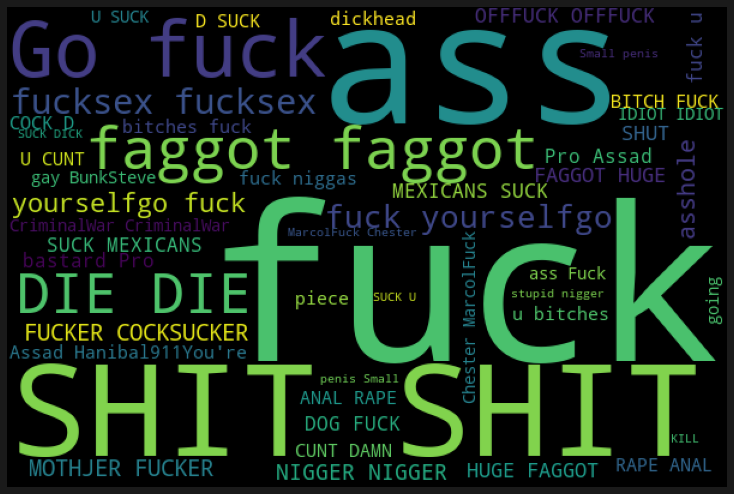

In [24]:
# Viusalising words which are categorised as Highly-Malignant words 

hams = train['comment_text'][train['highly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

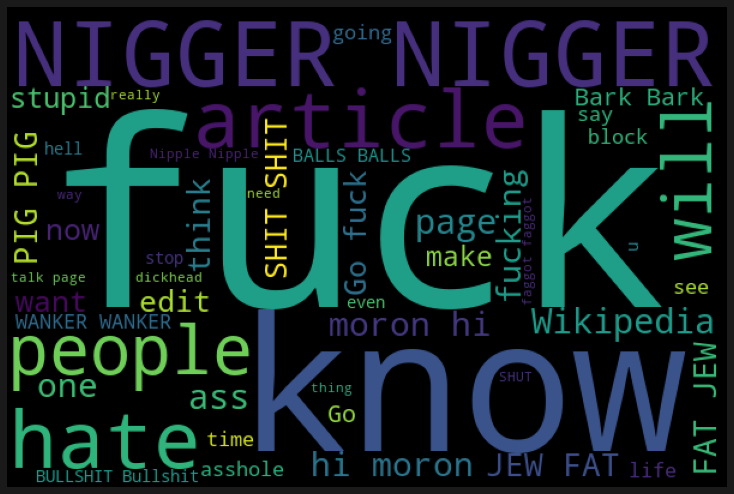

In [25]:
# Viusalising words which are categorised as Highly-Malignant words 

hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

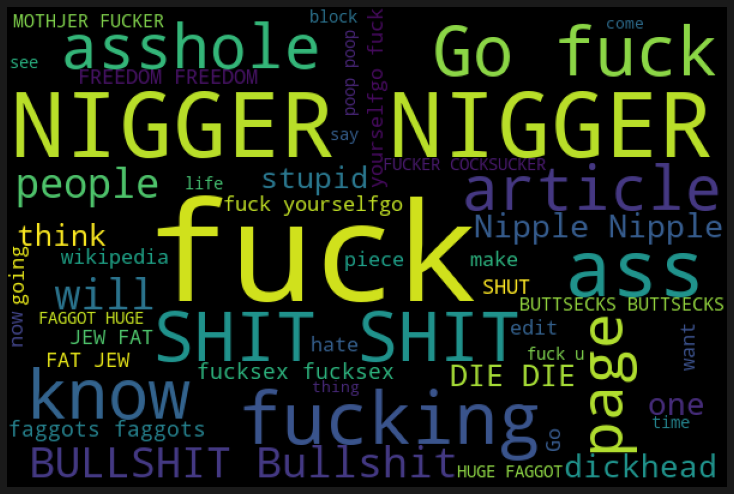

In [26]:
# Viusalising words which are categorised as Rude words 

hams = train['comment_text'][train['rude']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

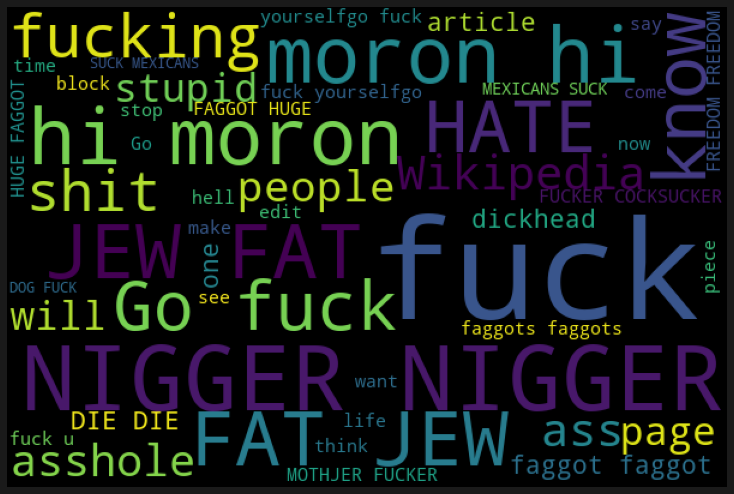

In [27]:
# Viusalising words which are categorised as Abusive words

hams = train['comment_text'][train['abuse']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

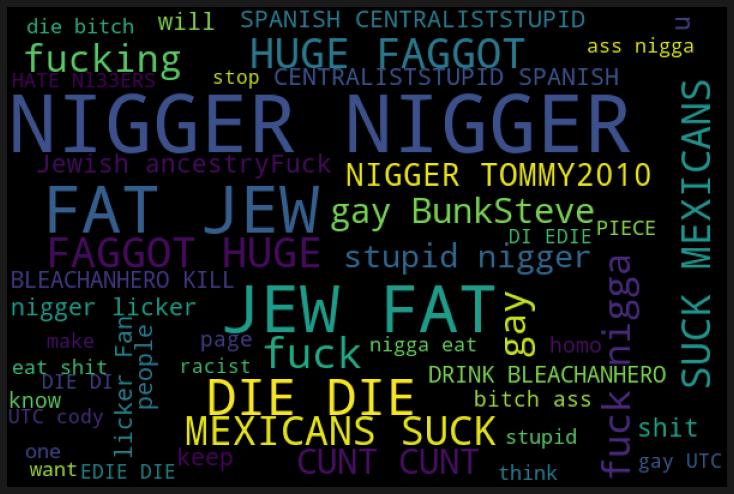

In [28]:
# Viusalising words which are categorised as Laothe words 

hams = train['comment_text'][train['loathe']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

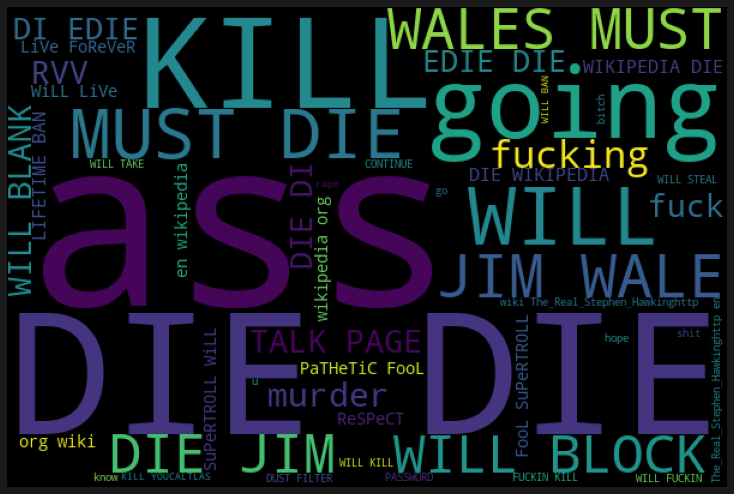

In [29]:
# Viusalising words which are categorised as Threatening words 

hams = train['comment_text'][train['threat']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

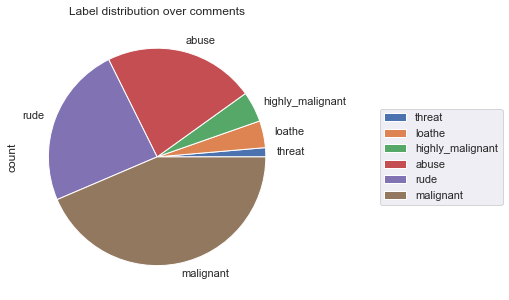

In [25]:
# Multivariate Analysis of all the multi labels.

target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

### Text Normalization

#### For Training csv

In [20]:
#Cleaning Data by lower casing them and removing special characters and numbers.

def  clean_text(train, comment_text, clean_comment):
    
    #Lower casing all str objects
    train['clean_comment'] = train['comment_text'].str.lower()
    
    train['clean_comment'] = train['clean_comment'].apply(lambda elem: re.sub(r"\n", " ", elem))
        
    train['clean_comment'] = train['clean_comment'].apply(lambda elem: re.sub(r"\d", " ", elem))   
    
    #Removing all numbers, special characters, web addresses and urls
    train['clean_comment'] = train['clean_comment'].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    
    # remove \n, \d
   
    
    return train

data_clean = clean_text(train, 'text', 'text_clean')
data_clean.head()                     

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww he matches this background colour im seem...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man im really not trying to edit war its j...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more i cant make any real suggestions on impr...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...


In [21]:
# Removing stopwords
stop = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
#stop = stopwords.words('english')
train['clean_comment'] = train['clean_comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww matches background colour seemingly stuck...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,cant make real suggestions improvement wondere...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page thats


In [22]:
#Splitting into word tokens

train['text_tokens'] = train['clean_comment'].apply(lambda x: word_tokenize(x))
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment,text_tokens
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...,"[explanation, edits, made, username, hardcore,..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww matches background colour seemingly stuck...,"[daww, matches, background, colour, seemingly,..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really trying edit war guy constantly ...,"[hey, man, really, trying, edit, war, guy, con..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,cant make real suggestions improvement wondere...,"[cant, make, real, suggestions, improvement, w..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page thats,"[sir, hero, chance, remember, page, thats]"


In [23]:
#Performing Lemmatization of words

def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
train['text_tokens_lemma'] = data_clean['text_tokens'].apply(lambda x: word_lemmatizer(x))
train['text_tokens_lemma'] = data_clean['text_tokens_lemma'].apply(lambda x: " ".join(x))

train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment,text_tokens,text_tokens_lemma
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...,"[explanation, edits, made, username, hardcore,...",explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww matches background colour seemingly stuck...,"[daww, matches, background, colour, seemingly,...",daww match background colour seemingly stuck t...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really trying edit war guy constantly ...,"[hey, man, really, trying, edit, war, guy, con...",hey man really trying edit war guy constantly ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,cant make real suggestions improvement wondere...,"[cant, make, real, suggestions, improvement, w...",cant make real suggestion improvement wondered...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page thats,"[sir, hero, chance, remember, page, thats]",sir hero chance remember page thats


In [35]:
#Performing part of speech tagging

def word_pos_tagger(text):
    pos_tagged_text = nltk.pos_tag(text)
    return pos_tagged_text

data_clean['text_tokens_pos_tagged'] = data_clean['text_tokens'].apply(lambda x: word_pos_tagger(x))
data_clean.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment,text_tokens,text_tokens_lemma,text_tokens_pos_tagged
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...,"[explanation, edits, made, username, hardcore,...",explanation edits made username hardcore metal...,"[(explanation, NN), (edits, NNS), (made, VBN),..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww matches background colour seemingly stuck...,"[daww, matches, background, colour, seemingly,...",daww match background colour seemingly stuck t...,"[(daww, NN), (matches, NNS), (background, IN),..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man really trying edit war guy constantly ...,"[hey, man, really, trying, edit, war, guy, con...",hey man really trying edit war guy constantly ...,"[(hey, NN), (man, NN), (really, RB), (trying, ..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,cant make real suggestions improvement wondere...,"[cant, make, real, suggestions, improvement, w...",cant make real suggestion improvement wondered...,"[(cant, JJ), (make, VB), (real, JJ), (suggesti..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page thats,"[sir, hero, chance, remember, page, thats]",sir hero chance remember page thats,"[(sir, NN), (hero, NN), (chance, NN), (remembe..."


In [26]:
# Creating a new variable containing all labels. Subgrouping them to one toxic or non - toxic 
target_data = train[target]
train['Target'] =train[target].sum(axis =1)

In [27]:
#  Convert text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 20000, stop_words='english')
features = tf_vec.fit_transform(train['text_tokens_lemma'])

#### For Testing Csv

In [28]:
#Cleaning Data by lower casing them and removing special characters and numbers.

def  clean_text(train, comment_text, clean_comment):
    
    #Lower casing all str objects
    test['clean_comment'] = test['comment_text'].str.lower()
    
    test['clean_comment'] = test['clean_comment'].apply(lambda elem: re.sub(r"\n", " ", elem))
        
    test['clean_comment'] = test['clean_comment'].apply(lambda elem: re.sub(r"\d", " ", elem))   
    
    #Removing all numbers, special characters, web addresses and urls
    test['clean_comment'] = test['clean_comment'].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    
    # remove \n, \d
   
    
    return test

data_clean = clean_text(test, 'text', 'text_clean')
data_clean.head()                     

,id,comment_text,clean_comment
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then youll ...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,from rfc the title is fine as it is imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",sources zawe ashton on lapland
3,00017563c3f7919a,":If you have a look back at the source, the in...",if you have a look back at the source the info...
4,00017695ad8997eb,I don't anonymously edit articles at all.,i dont anonymously edit articles at all


In [29]:
# Removing stopwords
stop = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
#stop = stopwords.words('english')
test['clean_comment'] = test['clean_comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test.head()

,id,comment_text,clean_comment
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule succesful youll ever whats ha...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,rfc title fine imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",sources zawe ashton lapland
3,00017563c3f7919a,":If you have a look back at the source, the in...",look back source information updated correct f...
4,00017695ad8997eb,I don't anonymously edit articles at all.,anonymously edit articles


In [30]:
#Splitting into word tokens

test['text_tokens'] = test['clean_comment'].apply(lambda x: word_tokenize(x))
test.head()

,id,comment_text,clean_comment,text_tokens
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule succesful youll ever whats ha...,"[yo, bitch, ja, rule, succesful, youll, ever, ..."
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,rfc title fine imo,"[rfc, title, fine, imo]"
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",sources zawe ashton lapland,"[sources, zawe, ashton, lapland]"
3,00017563c3f7919a,":If you have a look back at the source, the in...",look back source information updated correct f...,"[look, back, source, information, updated, cor..."
4,00017695ad8997eb,I don't anonymously edit articles at all.,anonymously edit articles,"[anonymously, edit, articles]"


In [31]:
#Performing Lemmatization of words

def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
test['text_tokens_lemma'] = test['text_tokens'].apply(lambda x: word_lemmatizer(x))
test['text_tokens_lemma'] = test['text_tokens_lemma'].apply(lambda x: " ".join(x))

test.head()

,id,comment_text,clean_comment,text_tokens,text_tokens_lemma
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule succesful youll ever whats ha...,"[yo, bitch, ja, rule, succesful, youll, ever, ...",yo bitch ja rule succesful youll ever whats ha...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,rfc title fine imo,"[rfc, title, fine, imo]",rfc title fine imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",sources zawe ashton lapland,"[sources, zawe, ashton, lapland]",source zawe ashton lapland
3,00017563c3f7919a,":If you have a look back at the source, the in...",look back source information updated correct f...,"[look, back, source, information, updated, cor...",look back source information updated correct f...
4,00017695ad8997eb,I don't anonymously edit articles at all.,anonymously edit articles,"[anonymously, edit, articles]",anonymously edit article


In [32]:
#  Convert text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 20000, stop_words='english')
test = tf_vec.fit_transform(test['text_tokens_lemma'])


### Splitting Dataset 

In [33]:
#Dividing into target and features
X = features
y = train['Target']

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=56,test_size=.30)

In [35]:
X_train.shape, X_test.shape

((111699, 20000), (47872, 20000))

In [36]:
y_train.shape, y_test.shape

((111699,), (47872,))

## Logistic Regression

In [41]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(X_train, y_train)

y_pred_train = LG.predict(X_train)
print('Training accuracy is {} \n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(X_test)
print('Test accuracy is {} \n'.format(accuracy_score(y_test,y_pred_test)))
print("\n \n ",confusion_matrix(y_test,y_pred_test))
print("\n \n ",classification_report(y_test,y_pred_test))

Training accuracy is 0.9324792522762065 

Test accuracy is 0.918240307486631 


 
  [[42828   106     9     7     0     0     0]
 [ 1471   304    71    93     8     0     0]
 [  494   207   103   237    10     0     0]
 [  296   177   111   627    64     0     0]
 [   69    44    38   280    93     3     0]
 [   12    10     7    45    35     3     0]
 [    1     0     1     2     5     1     0]]

 
                precision    recall  f1-score   support

           0       0.95      1.00      0.97     42950
           1       0.36      0.16      0.22      1947
           2       0.30      0.10      0.15      1051
           3       0.49      0.49      0.49      1275
           4       0.43      0.18      0.25       527
           5       0.43      0.03      0.05       112
           6       0.00      0.00      0.00        10

    accuracy                           0.92     47872
   macro avg       0.42      0.28      0.30     47872
weighted avg       0.89      0.92      0.90     47872

In [42]:
# Performing Evaluation metrics for our model
predlg = LG.predict(X_test)

print('Accuracy Score for Logistic Regression is :',round(accuracy_score(y_test,predlg),4)*100,'% \n')
print('Confusion Matrix of Logistic Regression : \n',confusion_matrix(y_test,predlg), '\n')
print('Classification Logistic Regression : \n',classification_report(y_test,predlg))
print("Hamming Loss for our Logistic Regression model is : ",hamming_loss(y_test,predlg))

Accuracy Score for Logistic Regression is : 91.82000000000001 % 

Confusion Matrix of Logistic Regression : 
 [[42828   106     9     7     0     0     0]
 [ 1471   304    71    93     8     0     0]
 [  494   207   103   237    10     0     0]
 [  296   177   111   627    64     0     0]
 [   69    44    38   280    93     3     0]
 [   12    10     7    45    35     3     0]
 [    1     0     1     2     5     1     0]] 

Classification Logistic Regression : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     42950
           1       0.36      0.16      0.22      1947
           2       0.30      0.10      0.15      1051
           3       0.49      0.49      0.49      1275
           4       0.43      0.18      0.25       527
           5       0.43      0.03      0.05       112
           6       0.00      0.00      0.00        10

    accuracy                           0.92     47872
   macro avg       0.42      0.28      0.30  

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

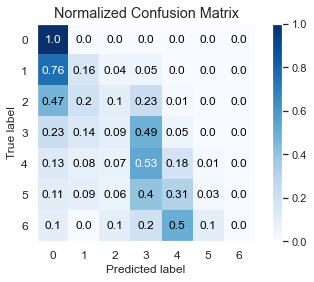

In [43]:
#Plotting Confusion Matrix of Logistic Regression model
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=True)

## Random Forest Classifier

In [44]:
RF = RandomForestClassifier(max_depth=7)

In [45]:
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=7)

In [46]:
# Performing Evaluation metrics for our model
predrf=RF.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predrf),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predrf), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predrf))
print("Hamming Loss for our Random Forest Classifier model is : ",hamming_loss(y_test,predrf))

Accuracy Score for Random Forest Classifier is : 89.72 % 

Confusion Matrix of Random Forest Classifier : 
 [[42950     0     0     0     0     0     0]
 [ 1947     0     0     0     0     0     0]
 [ 1051     0     0     0     0     0     0]
 [ 1275     0     0     0     0     0     0]
 [  527     0     0     0     0     0     0]
 [  112     0     0     0     0     0     0]
 [   10     0     0     0     0     0     0]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     42950
           1       0.00      0.00      0.00      1947
           2       0.00      0.00      0.00      1051
           3       0.00      0.00      0.00      1275
           4       0.00      0.00      0.00       527
           5       0.00      0.00      0.00       112
           6       0.00      0.00      0.00        10

    accuracy                           0.90     47872
   macro avg       0.13      0.14      0.1

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

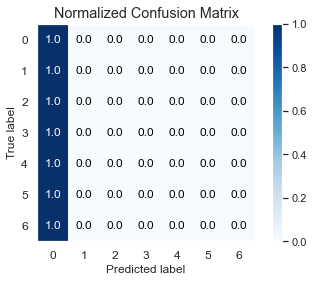

In [47]:
#Plotting Confusion Matrix of Logistic Regression model
skplt.metrics.plot_confusion_matrix(y_test, predrf, normalize=True)

## Multinomial Naive Bayes

In [48]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [49]:
MNB = MultinomialNB()
MNB.fit(X_train,y_train)

MultinomialNB()

In [50]:
# Performing Evaluation metrics for our model
predmnb= MNB.predict(X_test)
print('Accuracy Score for Multinomial Naive Bayes Classifier is :',round(accuracy_score(y_test,predmnb),4)*100,'% \n')
print('Confusion Matrix of Multinomial Naive Bayes Classifier : \n',confusion_matrix(y_test,predmnb), '\n')
print('Classification Multinomial Naive Bayes Classifier : \n',classification_report(y_test,predmnb))
print("Hamming Loss for our Multinomial Naive Bayes Classifier model is : ",hamming_loss(y_test,predrf))

Accuracy Score for Multinomial Naive Bayes Classifier is : 90.57 % 

Confusion Matrix of Multinomial Naive Bayes Classifier : 
 [[42945     4     0     1     0     0     0]
 [ 1906    13     2    26     0     0     0]
 [  934    25     2    90     0     0     0]
 [  830    44     3   396     2     0     0]
 [  196    31     1   297     2     0     0]
 [   36     6     1    69     0     0     0]
 [    2     0     0     8     0     0     0]] 

Classification Multinomial Naive Bayes Classifier : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.11      0.01      0.01      1947
           2       0.22      0.00      0.00      1051
           3       0.45      0.31      0.37      1275
           4       0.50      0.00      0.01       527
           5       0.00      0.00      0.00       112
           6       0.00      0.00      0.00        10

    accuracy                           0.91     47872
   macro avg

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

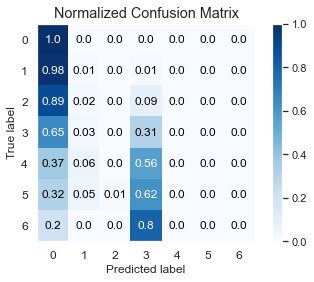

In [51]:
#Plotting Confusion Matrix of Logistic Regression model
skplt.metrics.plot_confusion_matrix(y_test, predmnb, normalize=True)

## AdaBoost Classifier

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
#Instantiating SVC model and training it

ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [54]:
# Performing Evaluation metrics for our model
predada= ada.predict(X_test)
print('Accuracy Score for Adaptive Boost Classifier is :',round(accuracy_score(y_test,predada),4)*100,'% \n')
print('Confusion Matrix of Adaptive Boost Classifier : \n',confusion_matrix(y_test,predada), '\n')
print('Classification Adaptive Boost Classifier : \n',classification_report(y_test,predada))
print("Hamming Loss for our Adaptive Boost Classifier is : ",hamming_loss(y_test,predada))

Accuracy Score for Adaptive Boost Classifier is : 90.71000000000001 % 

Confusion Matrix of Adaptive Boost Classifier : 
 [[42885    12     0    51     1     1     0]
 [ 1862     5     0    79     0     1     0]
 [  826     3     0   212    10     0     0]
 [  721     1     0   503    35     3    12]
 [  184     7     0   287    30     3    16]
 [   39     0     2    54    14     1     2]
 [    4     0     0     2     0     3     1]] 

Classification Adaptive Boost Classifier : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.18      0.00      0.01      1947
           2       0.00      0.00      0.00      1051
           3       0.42      0.39      0.41      1275
           4       0.33      0.06      0.10       527
           5       0.08      0.01      0.02       112
           6       0.03      0.10      0.05        10

    accuracy                           0.91     47872
   macro avg       0.28    

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

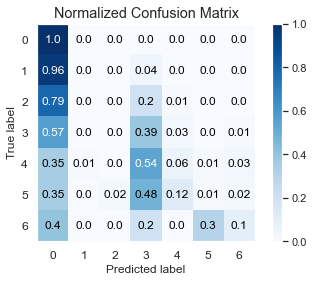

In [55]:
#Plotting Confusion Matrix of AdaBoost model
skplt.metrics.plot_confusion_matrix(y_test, predada, normalize=True)

## Linear Support Vector Classifier

In [2]:
from sklearn.svm import LinearSVC

In [57]:
svc = LinearSVC(max_iter = 3000)
svc.fit(X_train,y_train)

LinearSVC(max_iter=3000)

In [58]:
# Performing Evaluation metrics for our model
predsvc= svc.predict(X_test)
print('Accuracy Score for Linear SVC is :',round(accuracy_score(y_test,predsvc),4)*100,'% \n')
print('Confusion Matrix of Linear SVC : \n',confusion_matrix(y_test,predsvc), '\n')
print('Classification MLinear SVC : \n',classification_report(y_test,predsvc))
print("Hamming Loss for our Linear SVC model is : ",hamming_loss(y_test,predsvc))

Accuracy Score for Linear SVC is : 91.67 % 

Confusion Matrix of Linear SVC : 
 [[42719   179    26    24     2     0     0]
 [ 1345   330   118   130    21     3     0]
 [  422   203   121   259    45     1     0]
 [  212   204   128   602   123     6     0]
 [   47    51    44   265   108    12     0]
 [   10     9     5    49    35     4     0]
 [    1     0     1     4     3     1     0]] 

Classification MLinear SVC : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.34      0.17      0.23      1947
           2       0.27      0.12      0.16      1051
           3       0.45      0.47      0.46      1275
           4       0.32      0.20      0.25       527
           5       0.15      0.04      0.06       112
           6       0.00      0.00      0.00        10

    accuracy                           0.92     47872
   macro avg       0.36      0.28      0.30     47872
weighted avg       0.89      

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

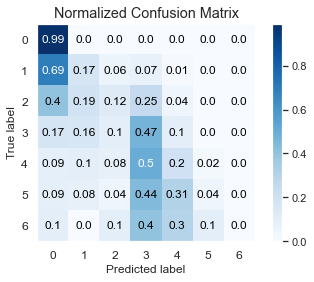

In [59]:
#Plotting Confusion Matrix of SVC model
skplt.metrics.plot_confusion_matrix(y_test, predsvc , normalize=True)

## Cross Validation Score of all models

In [60]:
CVscore_LR = cross_val_score(LG,X,y,cv = 10 )
print("Cross validation score of Logistic Regression is :", round(CVscore_LR.mean(),4)*100,'%')

CVscore_RF = cross_val_score(RF,X,y,cv = 10 )
print("Cross validation score of Random Forest Classifier :", round(CVscore_RF.mean(),4)*100,'%')

CVscore_adaboost = cross_val_score(ada,X,y,cv = 10 )
print("Cross validation score of AdaBoost Classifier is :",round(CVscore_adaboost.mean(),4)*100,'%')

CVscore_mnb = cross_val_score(MNB,X,y,cv = 10 )
print("Cross validation score of MNB Classifier is :",round(CVscore_mnb.mean(),4)*100,'%')

CVscore_svc = cross_val_score(svc,X,y, cv = 10)
print("Cross validation score of Linear Support Vector Classifier:", round(CVscore_svc.mean(),3)*100,'%')

Cross validation score of Logistic Regression is : 91.96 %
Cross validation score of Random Forest Classifier : 89.83 %
Cross validation score of AdaBoost Classifier is : 90.79 %
Cross validation score of MNB Classifier is : 90.81 %
Cross validation score of Linear Support Vector Classifier: 91.9 %


## Using LSTM Model

In [61]:
import tensorflow as tf
from keras.models import Sequential
from keras import utils
from tensorflow.keras.utils import to_categorical
from keras.layers import Flatten, Dense
from keras.layers.recurrent import LSTM
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential


In [62]:
train['Target'] = train.iloc[:,].sum(axis=1)
y = train['Target']

In [63]:
corpus = train['text_tokens_lemma']
corpus

0         explanation edits made username hardcore metal...
1         daww match background colour seemingly stuck t...
2         hey man really trying edit war guy constantly ...
3         cant make real suggestion improvement wondered...
4                       sir hero chance remember page thats
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: text_tokens_lemma, Length: 159571, dtype: object

In [64]:
voc_size = 5000

onehot_repr = [one_hot(words, voc_size) for words in corpus]
onehot_repr

[[176,
  1824,
  3940,
  810,
  934,
  2018,
  2890,
  2284,
  1743,
  2697,
  2779,
  596,
  2316,
  4074,
  3496,
  3440,
  2970,
  3181,
  1427,
  3229,
  869,
  2862,
  809,
  4728],
 [2215, 4162, 3839, 1996, 4588, 567, 2119, 869, 4947, 2861],
 [1266,
  3265,
  4178,
  1647,
  3827,
  2932,
  2268,
  1388,
  4728,
  1644,
  4001,
  3485,
  1824,
  1933,
  869,
  2862,
  2494,
  1833,
  2502,
  3608,
  3465],
 [3619,
  3494,
  2307,
  287,
  354,
  3754,
  2234,
  1595,
  3108,
  584,
  3010,
  1050,
  4790,
  445,
  1388,
  1425,
  3761,
  4379,
  4848,
  4048,
  948,
  4848,
  2386,
  3108,
  3762,
  3110,
  2194,
  944,
  2502,
  3177,
  445,
  3352,
  3181,
  4911,
  2914,
  2150,
  1384,
  2529,
  4638,
  822,
  1388,
  689,
  2976,
  1354,
  2033,
  1644,
  4997,
  856,
  257],
 [4447, 2296, 2876, 461, 2862, 1457],
 [1692, 2248, 2403, 456, 2248, 869],
 [333, 3734, 666, 4741],
 [2697, 630, 778, 2529, 2284, 3181, 977],
 [2561,
  4305,
  3358,
  79,
  4627,
  1448,
  545,
  4711,

In [65]:
longest = max(corpus,key=len)
len(longest)

5000

### Embedding Representation

In [66]:
sent_len = 50
embedded_docs = pad_sequences(onehot_repr,padding = 'pre', maxlen = sent_len)
print(embedded_docs)

[[   0    0    0 ... 2862  809 4728]
 [   0    0    0 ...  869 4947 2861]
 [   0    0    0 ... 2502 3608 3465]
 ...
 [   0    0    0 ... 1683 3054 3453]
 [   0    0    0 ... 2854 1762 4726]
 [   0    0    0 ... 1933  366 4080]]


### Creating LSTM Model

In [67]:
## Creating Model

embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length = sent_len))
model.add(LSTM(100))
model.add(Dense(1,activation = 'sigmoid')) 
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [68]:
len(embedded_docs),y.shape

(159571, (159571,))

In [69]:
X_final = np.array(embedded_docs) 
y_final = np.array(y)

In [70]:
X_final.shape , y_final.shape

((159571, 50), (159571,))

In [71]:
X_train,X_test, y_train,y_test = train_test_split(X_final,y_final, test_size = 0.3, random_state = 42)

In [72]:
### Training model 

history = model.fit(X_train,y_train, validation_data = (X_test,y_test),epochs = 10, batch_size = 64)

Epoch 1/10
1746/1746 [==============================] - 265s 149ms/step - loss: -3.2376 - accuracy: 0.6261 - val_loss: -14.2212 - val_accuracy: 0.8006
Epoch 2/10
1746/1746 [==============================] - 254s 146ms/step - loss: -30.1701 - accuracy: 0.7662 - val_loss: -48.0460 - val_accuracy: 0.7928
Epoch 3/10
1746/1746 [==============================] - 256s 147ms/step - loss: -66.6629 - accuracy: 0.7776 - val_loss: -84.9921 - val_accuracy: 0.7967
Epoch 4/10
1746/1746 [==============================] - 257s 147ms/step - loss: -104.0358 - accuracy: 0.7819 - val_loss: -117.5313 - val_accuracy: 0.7236
Epoch 5/10
1746/1746 [==============================] - 263s 151ms/step - loss: -140.8803 - accuracy: 0.7499 - val_loss: -153.2556 - val_accuracy: 0.7692
Epoch 6/10
1746/1746 [==============================] - 258s 148ms/step - loss: -177.1069 - accuracy: 0.7416 - val_loss: -181.3203 - val_accuracy: 0.7313
Epoch 7/10
1746/1746 [==============================] - 260s 149ms/step - loss: -20

In [73]:
y_predict = np.argmax(model.predict(X_test), axis=-1)

In [74]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [75]:
classes_x=np.argmax(y_pred,axis=1)
classes_x

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
## correct prediction
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [77]:
accuracy_score(y_test,y_pred)

0.8239680815508021

In [78]:
confusion_matrix(y_test,y_pred)

array([[39445,  3560,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0],
       [  926,   944,     0,     0,     0,     0,     0,     0],
       [  235,   832,     0,     0,     0,     0,     0,     0],
       [  123,  1149,     0,     0,     0,     0,     0,     0],
       [   26,   507,     0,     0,     0,     0,     0,     0],
       [    6,   115,     0,     0,     0,     0,     0,     0],
       [    0,     4,     0,     0,     0,     0,     0,     0]],
      dtype=int64)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

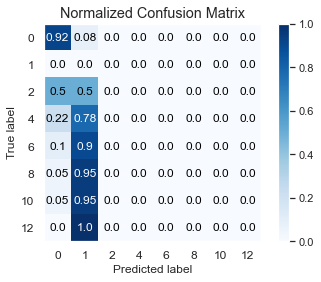

In [79]:
#Plotting Confusion Matrix of LSTM  model
skplt.metrics.plot_confusion_matrix(y_test, y_pred , normalize=True)

In [80]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     43005
           2       0.00      0.00      0.00      1870
           4       0.00      0.00      0.00      1067
           6       0.00      0.00      0.00      1272
           8       0.00      0.00      0.00       533
          10       0.00      0.00      0.00       121
          12       0.00      0.00      0.00         4

    accuracy                           0.90     47872
   macro avg       0.13      0.14      0.14     47872
weighted avg       0.81      0.90      0.85     47872



In [84]:
hamming_loss(y_test,classes_x)

0.10166694518716578

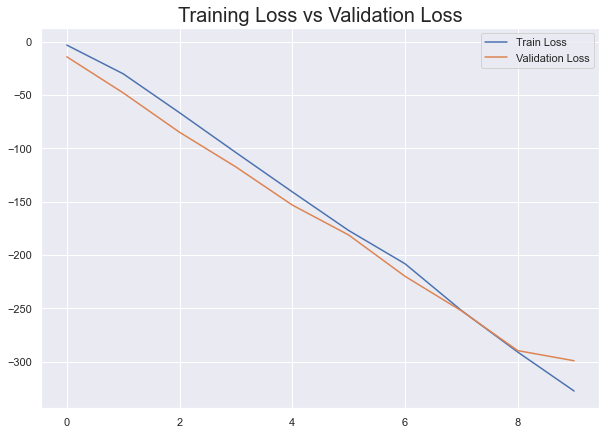

In [85]:
plt.figure(figsize = (10,7))
plt.title("Training Loss vs Validation Loss",fontsize =20)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()

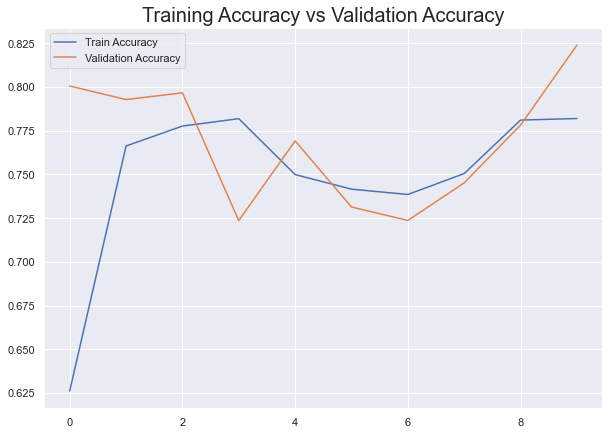

In [86]:
plt.figure(figsize = (10,7))
plt.title("Training Accuracy vs Validation Accuracy",fontsize =20)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

## Adding dropout of 30% to improve accuracy

In [81]:
from tensorflow.keras.layers import Dropout

In [82]:
## Creating Model

embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length = sent_len))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation = 'sigmoid')) 
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 50, 40)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [87]:
history = model.fit(X_train,y_train, validation_data = (X_test,y_test),epochs = 20, batch_size = 128)

Epoch 1/20
873/873 [==============================] - 227s 260ms/step - loss: 0.2844 - accuracy: 0.5283 - val_loss: -0.0440 - val_accuracy: 0.7808
Epoch 2/20
873/873 [==============================] - 222s 254ms/step - loss: -0.2956 - accuracy: 0.6491 - val_loss: -0.6708 - val_accuracy: 0.7818
Epoch 3/20
873/873 [==============================] - 220s 252ms/step - loss: -1.5388 - accuracy: 0.6850 - val_loss: -2.6461 - val_accuracy: 0.7373
Epoch 4/20
873/873 [==============================] - 209s 239ms/step - loss: -5.7907 - accuracy: 0.6551 - val_loss: -13.5359 - val_accuracy: 0.7924
Epoch 5/20
873/873 [==============================] - 211s 241ms/step - loss: -24.7201 - accuracy: 0.7734 - val_loss: -34.0428 - val_accuracy: 0.7967
Epoch 6/20
873/873 [==============================] - 212s 243ms/step - loss: -45.5325 - accuracy: 0.7850 - val_loss: -54.7243 - val_accuracy: 0.7916
Epoch 7/20
873/873 [==============================] - 209s 239ms/step - loss: -68.0548 - accuracy: 0.7974 - 

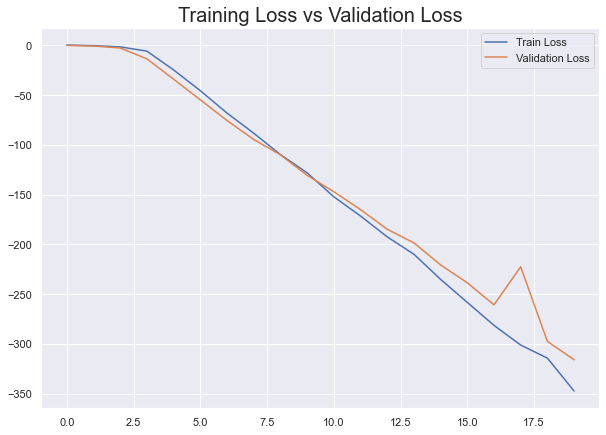

In [88]:
plt.figure(figsize = (10,7))
plt.title("Training Loss vs Validation Loss",fontsize =20)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()

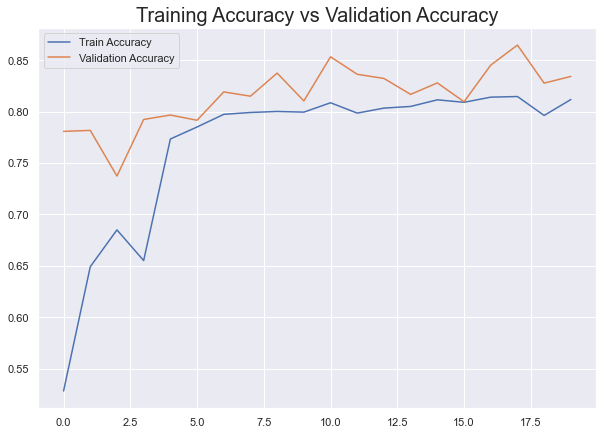

In [89]:
plt.figure(figsize = (10,7))
plt.title("Training Accuracy vs Validation Accuracy",fontsize =20)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

In [90]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [91]:
classes_x=np.argmax(y_pred,axis=1)
classes_x

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
accuracy_score(y_test,classes_x)

0.8983330548128342

In [93]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     43005
           2       0.00      0.00      0.00      1870
           4       0.00      0.00      0.00      1067
           6       0.00      0.00      0.00      1272
           8       0.00      0.00      0.00       533
          10       0.00      0.00      0.00       121
          12       0.00      0.00      0.00         4

    accuracy                           0.90     47872
   macro avg       0.13      0.14      0.14     47872
weighted avg       0.81      0.90      0.85     47872



In [94]:
hamming_loss(y_test,y_pred)

0.16575451203208555

In [95]:
confusion_matrix(y_test,classes_x)

array([[43005,     0,     0,     0,     0,     0,     0],
       [ 1870,     0,     0,     0,     0,     0,     0],
       [ 1067,     0,     0,     0,     0,     0,     0],
       [ 1272,     0,     0,     0,     0,     0,     0],
       [  533,     0,     0,     0,     0,     0,     0],
       [  121,     0,     0,     0,     0,     0,     0],
       [    4,     0,     0,     0,     0,     0,     0]], dtype=int64)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

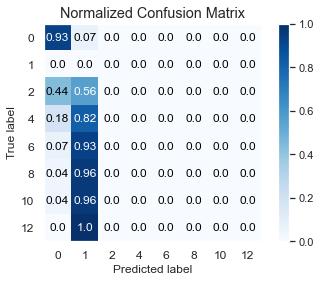

In [96]:
#Plotting Confusion Matrix of LSTM  model
skplt.metrics.plot_confusion_matrix(y_test, y_pred , normalize=True)

### Hyperparameter Tuning

In [135]:
from sklearn.model_selection import RandomizedSearchCV

In [134]:
params = {'penalty': ['l1','l2'],
         'loss':['hinge','squared_hinge'],
         'max_iter':[1000,2000,3000],
         'multi_class': ['ovr','crammer_singer'],
         'fit_intercept' : ['True', 'False'],
         'random_state': [10,20,50,82,4]}

In [136]:
#Instantiating Randomized SearchCV
randomcv = RandomizedSearchCV(estimator = svc, param_distributions = params, n_iter = 20, cv = 3, verbose=2, random_state=42)

In [ ]:
#fitting our random search cv model
randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END fit_intercept=True, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, random_state=4; total time=   0.0s
[CV] END fit_intercept=True, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, random_state=4; total time=   0.0s
[CV] END fit_intercept=True, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, random_state=4; total time=   0.0s
[CV] END fit_intercept=True, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, random_state=20; total time=  41.1s
[CV] END fit_intercept=True, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, random_state=20; total time=  39.8s
[CV] END fit_intercept=True, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, random_state=20; total time=  39.6s
[CV] END fit_intercept=True, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, random_state=82; total time=39.8min
[CV] END fit_intercept=True, loss=squared_hinge, max_iter=2000, multi_class=

In [ ]:
#To check the best parameters to increase model Accuracy
randomcv.best_params_

In [37]:
model = LinearSVC(random_state = 20, penalty = 'l2', multi_class = 'ovr', max_iter = 1000, loss= 'hinge', fit_intercept = True)

In [38]:
#Fitting our Tuned Model
model.fit(X_train,y_train)

LinearSVC(loss='hinge', random_state=20)

In [39]:
# Performing Evaluation metrics for our model
y_pred = model.predict(X_test)
print('Accuracy Score forLinear SVC model  Classifier is :',round(accuracy_score(y_test,y_pred),4)*100,'% \n')
print('Confusion Matrix of Linear SVC model Classifier : \n',confusion_matrix(y_test,y_pred), '\n')
print('Classification Linear SVC model Classifier : \n',classification_report(y_test,y_pred))
print("Hamming Loss for our Linear SVC model is : ",hamming_loss(y_test,y_pred))

Accuracy Score forLinear SVC model  Classifier is : 91.71000000000001 % 

Confusion Matrix of Linear SVC model Classifier : 
 [[42870    36    10    27     5     2     0]
 [ 1588   115    56   160    24     4     0]
 [  509    83    82   333    36     7     1]
 [  276    86    63   751    88    10     1]
 [   64    20    23   319    82    19     0]
 [   15     5     3    52    31     5     1]
 [    1     0     0     5     3     1     0]] 

Classification Linear SVC model Classifier : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     42950
           1       0.33      0.06      0.10      1947
           2       0.35      0.08      0.13      1051
           3       0.46      0.59      0.51      1275
           4       0.30      0.16      0.21       527
           5       0.10      0.04      0.06       112
           6       0.00      0.00      0.00        10

    accuracy                           0.92     47872
   macro avg       0.

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

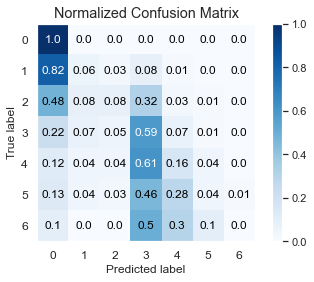

In [40]:
#Plotting Confusion Matrix Linear SVC Classifier model
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

### Binary Classifications

In [98]:
y.value_counts()

0     143346
2       6360
6       4209
4       3480
8       1760
10       385
12        31
Name: Target, dtype: int64

In [99]:
y.replace({2:1,6:1,4:1,8:1,10:1,12:1}, inplace = True)
y.value_counts()

0    143346
1     16225
Name: Target, dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

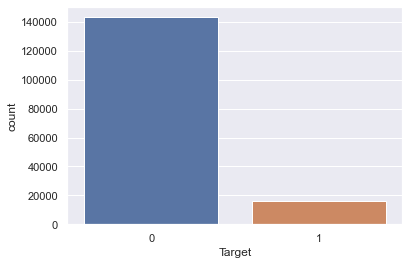

In [100]:
sns.countplot(y)

In [108]:
X = features

In [110]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 42 )

### Logistic Regression

In [111]:
# LogisticRegression
LG = LogisticRegression()

LG.fit(X_train, y_train)


LogisticRegression()

In [112]:
# Performing Evaluation metrics for our model
predlg = LG.predict(X_test)

print('Accuracy Score for Logistic Regression is :',round(accuracy_score(y_test,predlg),4)*100,'% \n')
print('Confusion Matrix of Logistic Regression : \n',confusion_matrix(y_test,predlg), '\n')
print('Classification Logistic Regression : \n',classification_report(y_test,predlg))
print("Hamming Loss for our Logistic Regression model is : ",hamming_loss(y_test,predlg))

Accuracy Score for Logistic Regression is : 95.52000000000001 % 

Confusion Matrix of Logistic Regression : 
 [[42791   214]
 [ 1933  2934]] 

Classification Logistic Regression : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     43005
           1       0.93      0.60      0.73      4867

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.85     47872
weighted avg       0.95      0.96      0.95     47872

Hamming Loss for our Logistic Regression model is :  0.044848763368983954


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

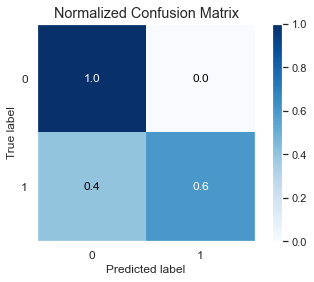

In [113]:
#Plotting Confusion Matrix Logistic Regression Classifier model
skplt.metrics.plot_confusion_matrix(y_test, predlg, normalize=True)

### Random Forest Classifier

In [115]:
#Model instantiating and training it
RF = RandomForestClassifier()
RF.fit(X_train,y_train)


RandomForestClassifier()

In [117]:
# Performing Evaluation metrics for our model
predrf=RF.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predrf),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predrf), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predrf))
print("Hamming Loss for our Random Forest Classifier model is : ",hamming_loss(y_test,predrf))

Accuracy Score for Random Forest Classifier is : 95.59 % 

Confusion Matrix of Random Forest Classifier : 
 [[42528   477]
 [ 1632  3235]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     43005
           1       0.87      0.66      0.75      4867

    accuracy                           0.96     47872
   macro avg       0.92      0.83      0.86     47872
weighted avg       0.95      0.96      0.95     47872

Hamming Loss for our Random Forest Classifier model is :  0.04405497994652406


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

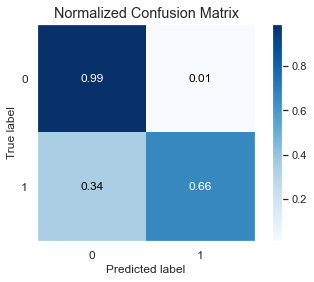

In [118]:
#Plotting Confusion Matrix Logistic Regression Classifier model
skplt.metrics.plot_confusion_matrix(y_test, predrf, normalize=True)

### Linear SVC

In [119]:
svc = LinearSVC(max_iter = 3000)
svc.fit(X_train,y_train)

LinearSVC(max_iter=3000)

In [120]:
# Performing Evaluation metrics for our model
predsvc= svc.predict(X_test)
print('Accuracy Score for Linear SVC is :',round(accuracy_score(y_test,predsvc),4)*100,'% \n')
print('Confusion Matrix of Linear SVC : \n',confusion_matrix(y_test,predsvc), '\n')
print('Classification MLinear SVC : \n',classification_report(y_test,predsvc))
print("Hamming Loss for our Linear SVC model is : ",hamming_loss(y_test,predsvc))

Accuracy Score for Linear SVC is : 95.84 % 

Confusion Matrix of Linear SVC : 
 [[42533   472]
 [ 1518  3349]] 

Classification MLinear SVC : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     43005
           1       0.88      0.69      0.77      4867

    accuracy                           0.96     47872
   macro avg       0.92      0.84      0.87     47872
weighted avg       0.96      0.96      0.96     47872

Hamming Loss for our Linear SVC model is :  0.04156918449197861


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

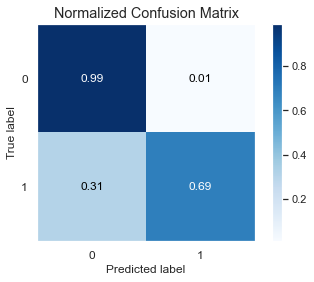

In [121]:
#Plotting Confusion Matrix Linear SVC Classifier model
skplt.metrics.plot_confusion_matrix(y_test, predsvc, normalize=True)

### Multinomial Naive Bayes

In [122]:
MNB = MultinomialNB()
MNB.fit(X_train,y_train)

MultinomialNB()

In [123]:
# Performing Evaluation metrics for our model
predmnb= MNB.predict(X_test)
print('Accuracy Score for Multinomial Naive Bayes Classifier is :',round(accuracy_score(y_test,predmnb),4)*100,'% \n')
print('Confusion Matrix of Multinomial Naive Bayes Classifier : \n',confusion_matrix(y_test,predmnb), '\n')
print('Classification Multinomial Naive Bayes Classifier : \n',classification_report(y_test,predmnb))
print("Hamming Loss for our Multinomial Naive Bayes Classifier model is : ",hamming_loss(y_test,predrf))

Accuracy Score for Multinomial Naive Bayes Classifier is : 94.33 % 

Confusion Matrix of Multinomial Naive Bayes Classifier : 
 [[42866   139]
 [ 2576  2291]] 

Classification Multinomial Naive Bayes Classifier : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     43005
           1       0.94      0.47      0.63      4867

    accuracy                           0.94     47872
   macro avg       0.94      0.73      0.80     47872
weighted avg       0.94      0.94      0.93     47872

Hamming Loss for our Multinomial Naive Bayes Classifier model is :  0.04405497994652406


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

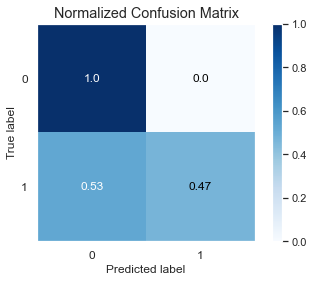

In [124]:
#Plotting Confusion Matrix of MNB model
skplt.metrics.plot_confusion_matrix(y_test, predmnb, normalize=True)

### AdaBoost Classifier

In [125]:
#Instantiating SVC model and training it

ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [126]:
# Performing Evaluation metrics for our model
predada= ada.predict(X_test)
print('Accuracy Score for Adaptive Boost Classifier is :',round(accuracy_score(y_test,predada),4)*100,'% \n')
print('Confusion Matrix of Adaptive Boost Classifier : \n',confusion_matrix(y_test,predada), '\n')
print('Classification Adaptive Boost Classifier : \n',classification_report(y_test,predada))
print("Hamming Loss for our Adaptive Boost Classifier is : ",hamming_loss(y_test,predada))

Accuracy Score for Adaptive Boost Classifier is : 94.55 % 

Confusion Matrix of Adaptive Boost Classifier : 
 [[42643   362]
 [ 2248  2619]] 

Classification Adaptive Boost Classifier : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     43005
           1       0.88      0.54      0.67      4867

    accuracy                           0.95     47872
   macro avg       0.91      0.76      0.82     47872
weighted avg       0.94      0.95      0.94     47872

Hamming Loss for our Adaptive Boost Classifier is :  0.05452038770053476


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

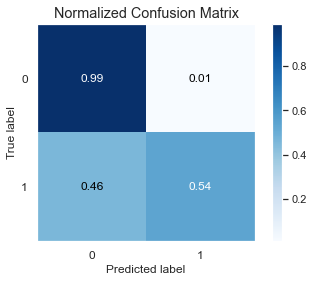

In [127]:
#Plotting Confusion Matrix of Adaboost model
skplt.metrics.plot_confusion_matrix(y_test, predada, normalize=True)

### LSTM Model 

In [128]:
X_final = np.array(embedded_docs) 
y_final = np.array(y)

In [129]:
X_train,X_test, y_train,y_test = train_test_split(X_final,y_final, test_size = 0.3, random_state = 42)

In [130]:
## Creating Model

embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length = sent_len))
model.add(LSTM(100))
model.add(Dense(1,activation = 'sigmoid')) 
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 40)            200000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [131]:
### Training model 

history = model.fit(X_train,y_train, validation_data = (X_test,y_test),epochs = 10, batch_size = 128)

Epoch 1/10
873/873 [==============================] - 207s 233ms/step - loss: 0.1881 - accuracy: 0.9361 - val_loss: 0.1477 - val_accuracy: 0.9484
Epoch 2/10
873/873 [==============================] - 204s 233ms/step - loss: 0.1346 - accuracy: 0.9509 - val_loss: 0.1465 - val_accuracy: 0.9488
Epoch 3/10
873/873 [==============================] - 218s 249ms/step - loss: 0.1236 - accuracy: 0.9540 - val_loss: 0.1499 - val_accuracy: 0.9491
Epoch 4/10
873/873 [==============================] - 168s 193ms/step - loss: 0.1115 - accuracy: 0.9580 - val_loss: 0.1551 - val_accuracy: 0.9459
Epoch 5/10
873/873 [==============================] - 254s 291ms/step - loss: 0.0983 - accuracy: 0.9635 - val_loss: 0.1777 - val_accuracy: 0.9442
Epoch 6/10
873/873 [==============================] - 255s 292ms/step - loss: 0.0873 - accuracy: 0.9680 - val_loss: 0.1775 - val_accuracy: 0.9416
Epoch 7/10
873/873 [==============================] - 185s 212ms/step - loss: 0.0772 - accuracy: 0.9714 - val_loss: 0.2052 -

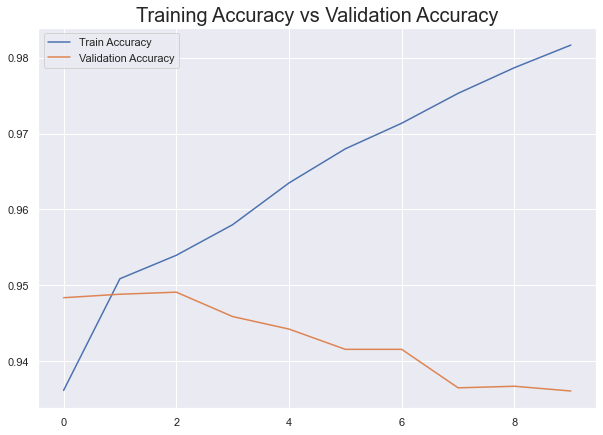

In [132]:
plt.figure(figsize = (10,7))
plt.title("Training Accuracy vs Validation Accuracy",fontsize =20)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

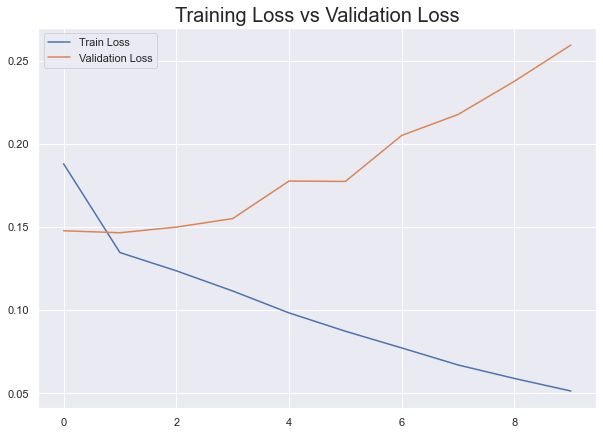

In [133]:
plt.figure(figsize = (10,7))
plt.title("Training Loss vs Validation Loss",fontsize =20)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

## Saving Final Model

In [41]:
joblib.dump(model,"MalignantCommentClassification.pkl")

['MalignantCommentClassification.pkl']

## Loading Final Model

In [42]:
Model = joblib.load("MalignantCommentClassification.pkl")

In [45]:
#Making preditions on our test csv 
predictions  = pd.Series(Model.predict(test))

In [46]:
#Converting the saved file into .csv format
predictions.to_csv('Results.csv',index = True)